In [1]:
# 图像分析与理解
# 形态学实验 - 二值图像
# 东南大学，卓旭，212138

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import functools

In [3]:
### Helper Functions ###
from helper import readBinaryImage, display

# These functions suppose that the original point is the center of SE.
# We only consider those points inside the image when SE aligns with the corners or edges. I.e., pad True at borders.
# cuMorph is a set of CUDA acclerated morphology operations
# by ZHUO Xu (212138) @ SEU
from cuMorph import union, intersect, same, binaryComplement, binaryErode, binaryDilate, binaryOpen, binaryClose, hitOrMiss, convexHull

H, W =  (340, 325)


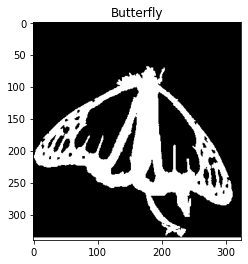

In [4]:
# 1 - 读取butterfly.txt
I0 = readBinaryImage('./binary/butterfly.txt')
plt.figure(); display(I0, 'Butterfly')
print('H, W = ', I0.shape)

(7, 7)

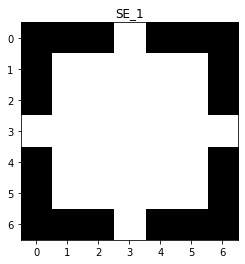

In [5]:
# 2 - 开操作与闭操作
# a) SE开I0
SE_1 = readBinaryImage('./binary/se_1.txt')
plt.figure(); display(SE_1, 'SE_1')
SE_1.shape

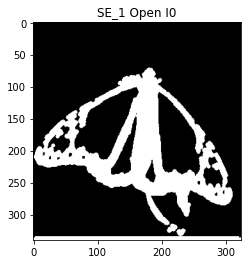

In [6]:
SE_1_Open_I0 = binaryOpen(I0, SE_1)
plt.figure(); display(SE_1_Open_I0, 'SE_1 Open I0')

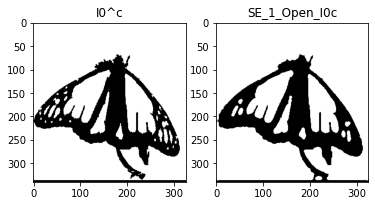

In [7]:
# b) SE开I0^c
I0c = binaryComplement(I0)
SE_1_Open_I0c = binaryOpen(I0c, SE_1)
plt.figure(); plt.subplot(121); display(I0c, 'I0^c')
plt.subplot(122); display(SE_1_Open_I0c, 'SE_1_Open_I0c')

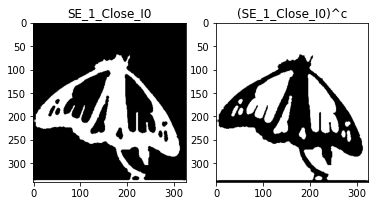

In [8]:
# c) SE闭I0
SE_1_Close_I0 = binaryClose(I0, SE_1)
plt.figure(); plt.subplot(121); display(SE_1_Close_I0, 'SE_1_Close_I0');
plt.subplot(122); display(binaryComplement(SE_1_Close_I0), '(SE_1_Close_I0)^c');

(340, 325)

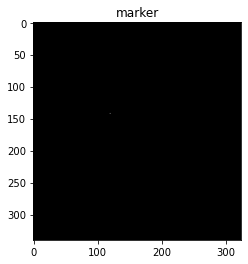

In [9]:
# 3 - 形态学重建
# a)
Im = readBinaryImage('./binary/marker.txt')
plt.figure(); display(Im, 'marker')
Im.shape

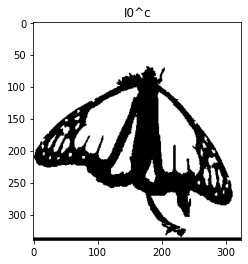

In [10]:
# b)
I0c = binaryComplement(I0)
plt.figure(); display(I0c, 'I0^c')

In [11]:
# c)
Ir = Im
Irs = [np.array(Ir)]
i = 0
while True:
    Ir = intersect(binaryDilate(Ir, SE_1), I0c)
    if same(Ir, Irs[-1]):
        break
    Irs.append(np.array(Ir))
    i += 1
print('Total iter: ', i)

Total iter:  28


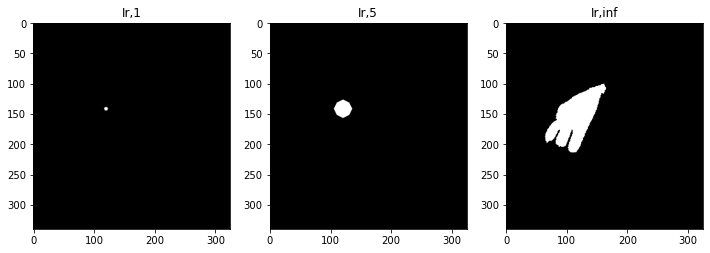

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(131); display(Irs[1], 'Ir,1')
plt.subplot(132); display(Irs[5], 'Ir,5')
plt.subplot(133); display(Irs[-1], 'Ir,inf')

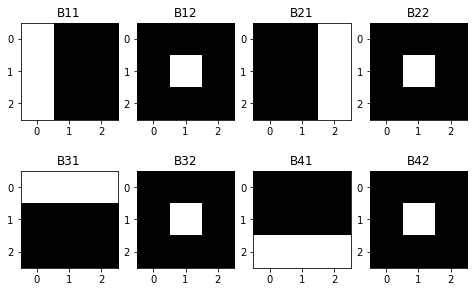

In [13]:
# 4 - Convex Hull
I1 = Irs[-1]
B11 = readBinaryImage('./binary/convex_hull_se/B11.txt'); B12 = readBinaryImage('./binary/convex_hull_se/B12.txt')
B21 = readBinaryImage('./binary/convex_hull_se/B21.txt'); B22 = readBinaryImage('./binary/convex_hull_se/B22.txt')
B31 = readBinaryImage('./binary/convex_hull_se/B31.txt'); B32 = readBinaryImage('./binary/convex_hull_se/B32.txt')
B41 = readBinaryImage('./binary/convex_hull_se/B41.txt'); B42 = readBinaryImage('./binary/convex_hull_se/B42.txt')
plt.figure(figsize=(8, 5))
plt.subplot(241); display(B11, 'B11'); plt.subplot(242); display(B12, 'B12')
plt.subplot(243); display(B21, 'B21'); plt.subplot(244); display(B22, 'B22')
plt.subplot(245); display(B31, 'B31'); plt.subplot(246); display(B32, 'B32')
plt.subplot(247); display(B41, 'B41'); plt.subplot(248); display(B42, 'B42')

In [14]:
tic = time.time()

Total iter:  78


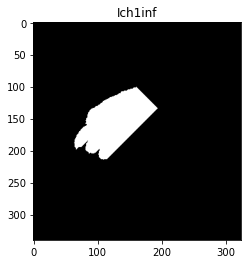

In [15]:
Ich1inf, iter1 = convexHull(I1, B11, B12)
plt.figure(); display(Ich1inf, 'Ich1inf')
print('Total iter: ', iter1)

Total iter:  40


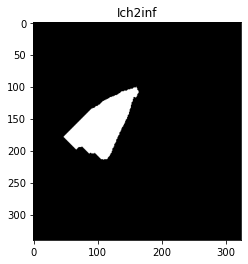

In [16]:
Ich2inf, iter2 = convexHull(I1, B21, B22)
plt.figure(); display(Ich2inf, 'Ich2inf')
print('Total iter: ', iter2)

Total iter:  53


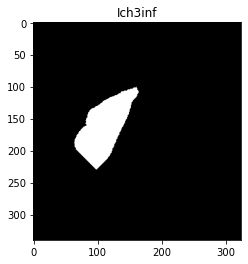

In [17]:
Ich3inf, iter3 = convexHull(I1, B31, B32)
plt.figure(); display(Ich3inf, 'Ich3inf')
print('Total iter: ', iter3)

Total iter:  52


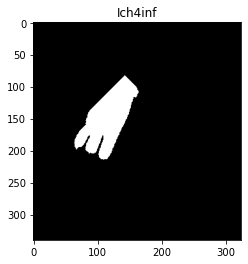

In [18]:
Ich4inf, iter4 = convexHull(I1, B41, B42)
plt.figure(); display(Ich4inf, 'Ich4inf')
print('Total iter: ', iter4)

In [19]:
toc = time.time()
print('Time elapsed: {:.3f} secs.'.format(toc - tic))

Time elapsed: 1.530 secs.


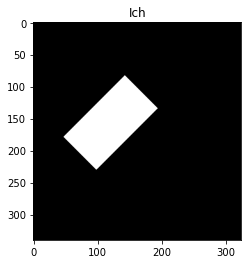

In [20]:
Ich = functools.reduce(union, [Ich1inf, Ich2inf, Ich3inf, Ich4inf])
plt.figure(); display(Ich, 'Ich')